# Text into Data

```yaml
Course:   DS 5001 
Module:   02 Text Models
Topic:    Text into Data / Importing a Text, or, Clip, Chunk, and Split
Author:   R.C. Alvarado (Edited by Andrew Avitabile)
Date:     24 January 2024 (revised)
```

## Purpose

Ww import a text using the  Clip, Chunk, and Split pattern.

Demonstrate how to tokenize a raw text and map an OHCO onto the resulting dataframe of tokens.

This goes beyond what we did last week in the First Foray notebook. We capture the chapter, paragraph, and sentence structure of the text.

## Set Up

## Import libraries

In [1]:
import pandas as pd

### Import Config

In [2]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']

In [3]:
data_home, output_dir

('C:/Users/Andre/OneDrive - University of Virginia/Course Materials/Spring 2024/DS5001/data',
 'C:/Users/Andre/OneDrive - University of Virginia/Course Materials/Spring 2024/DS5001/output')

In [5]:
#f strings will allow us to use these strings in code later on
text_file = f"{data_home}/gutenberg/pg105.txt"
csv_file  = f"{output_dir}/austen-persuasion.csv" # The file we will create

In [7]:
#These values will be the names of the columns in our data
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

## Import file into a dataframe

In [8]:
#Create a dataframe in pandas, open a text file, sometimes encode, readlines opens a file and converst to strings, name column "line_str"
LINES = pd.DataFrame(open(text_file, 'r', encoding='utf-8-sig').readlines(), columns=['line_str'])

#Create a column with the index number
LINES.index.name = 'line_num'

# Replace line breaks
LINES.line_str = LINES.line_str.str.replace(r'\n+', ' ', regex=True).str.strip()

In [9]:
LINES.sample(20)

,line_str
line_num,
6372,"""I was not at all aware of this. You never me..."
8298,"by one artful woman, at least."
8630,
5977,"It seems, on the contrary, to have been a perf..."
8212,"it into their heads to marry, they are pretty ..."
3994,own sister's intimacy with Mrs Clay. She was ...
3671,
6890,his affairs was fully known. With a confidenc...
6741,Marlborough Buildings. When I talked of a who...


## Extract Title 

In [10]:
title = LINES.loc[0].line_str.replace('The Project Gutenberg EBook of ', '')

In [11]:
print(title)

Persuasion, by Jane Austen


## Clip the Cruft - Get rid of stuff we aren't intrested in

In [16]:
#Regular expression
clip_pats = [
    r"\*\*\*\s*START OF (?:THE|THIS) PROJECT",
    r"\*\*\*\s*END OF (?:THE|THIS) PROJECT"
]

In [13]:
#Search for lines that match the regular expressions
pat_a = LINES.line_str.str.match(clip_pats[0])
pat_b = LINES.line_str.str.match(clip_pats[1])

In [14]:
# indicate lines between these things
line_a = LINES.loc[pat_a].index[0] + 1
line_b = LINES.loc[pat_b].index[0] - 1

In [15]:
# Lines that contain the story
line_a, line_b

(19, 8372)

In [17]:
#Selct just the lines that contain the story in the lines
LINES = LINES.loc[line_a : line_b]

In [18]:
LINES.head(10)

,line_str
line_num,
19,
20,
21,
22,
23,Produced by Sharon Partridge and Martin Ward. ...
24,by Al Haines.
25,
26,
27,


In [19]:
LINES.tail(10)

,line_str
line_num,
8363,
8364,
8365,
8366,
8367,
8368,
8369,
8370,
8371,End of the Project Gutenberg EBook of Persuasi...


## Chunk by Chapter

### Find all chapter headers

The regex will depend on the source text. You need to investigate the source text to figure this out.

In [21]:
#Regular expression to find chapters
chap_pat = r"^\s*(?:chapter|letter)\s+\d+"

In [22]:
#A vector of lines where there are chapters
chap_lines = LINES.line_str.str.match(chap_pat, case=False) # Returns a truth vector

In [25]:
#Filter the LINES data frame to find chapters
LINES.loc[chap_lines] # Use as filter for dataframe

,line_str
line_num,
47,Chapter 1
306,Chapter 2
500,Chapter 3
786,Chapter 4
959,Chapter 5
1297,Chapter 6
1657,Chapter 7
1992,Chapter 8
2346,Chapter 9


### Assign numbers to chapters

In [26]:
#For all headers, apply a vector of numbers to the dataframe
LINES.loc[chap_lines, 'chap_num'] = [i+1 for i in range(LINES.loc[chap_lines].shape[0])]

In [27]:
LINES.loc[chap_lines]

,line_str,chap_num
line_num,,
47,Chapter 1,1.0
306,Chapter 2,2.0
500,Chapter 3,3.0
786,Chapter 4,4.0
959,Chapter 5,5.0
1297,Chapter 6,6.0
1657,Chapter 7,7.0
1992,Chapter 8,8.0
2346,Chapter 9,9.0


Notice that all lines that are not chapter headers have no chapter number assigned to them.

In [28]:
LINES.sample(10)

,line_str,chap_num
line_num,,
1817,,NaN
563,but what restrictions I might impose on the us...,NaN
3143,"an officer, whom he had always valued highly, ...",NaN
2294,Seas. I lived in perpetual fright at that tim...,NaN
1129,well as those of Kellynch. The two families we...,NaN
7435,"""You have not been long enough in Bath,"" said ...",NaN
4305,"not press for it at all; and, on the contrary,...",NaN
3827,"general, his voice and manner were studiously ...",NaN
5573,"""Well, she is to marry him. Nay, most likely ...",NaN


### Forward-fill chapter numbers to following text lines

`ffill()` will replace null values with the previous non-null value.

In [29]:
#ffill (forward fill) essentially drags down the chapter number to subsequent rows will NaN's 
LINES.chap_num = LINES.chap_num.ffill()

In [31]:
LINES.sample(10)

,line_str,chap_num
line_num,,
5512,"at the picture, as they began to be in motion.",18.0
4362,"""I hope I shall remember, in future,"" said Lad...",14.0
8220,"deal more than they met with, for there was li...",24.0
7366,Mary eagerly interrupted her by exclaiming--,22.0
6449,,21.0
2026,,8.0
1466,"loss of her dear mother, known the happiness o...",6.0
912,"gained the other step in rank, and must now, b...",4.0
8231,,24.0


Notice that the lines taht precede our first chapter have no chapters, which is what we want. We need to decide whether to keep these lines as textual front matter or to dispose of them.

In [32]:
LINES.head(20)

,line_str,chap_num
line_num,,
19,,NaN
20,,NaN
21,,NaN
22,,NaN
23,Produced by Sharon Partridge and Martin Ward. ...,NaN
24,by Al Haines.,NaN
25,,NaN
26,,NaN
27,,NaN


### Clean up

In [33]:
LINES = LINES.dropna(subset=['chap_num']) # Remove everything before Chapter 1
# LINES = LINES.loc[~LINES.chap_num.isna()] # Remove everything before Chapter 1 (alternate method)
LINES = LINES.loc[~chap_lines] # Remove chapter heading lines; their work is done
LINES.chap_num = LINES.chap_num.astype('int') # Convert chap_num from float to int

In [34]:
LINES.sample(10)

,line_str,chap_num
line_num,,
767,extremely well; very much better than to any m...,3
3852,"when, as they were going up their last hill, A...",12
174,Elizabeth did not quite equal her father in pe...,1
667,,3
1678,even in the midst of the serious anxiety which...,7
962,On the morning appointed for Admiral and Mrs C...,5
7022,,22
3575,ran up the steps to be jumped down again. He ...,12
6002,"more I found to admire.""",20


### Group lines into chapters

In [35]:
OHCO[:1]

['chap_num']

In [38]:
# Make big string for each chapter - data frame where each line is a chapter
CHAPS = LINES.groupby(OHCO[:1])\
    .line_str.apply(lambda x: '\n'.join(x))\
    .to_frame('chap_str')

In [39]:
CHAPS.head(10)

,chap_str
chap_num,
1,"\n\nSir Walter Elliot, of Kellynch Hall, in So..."
2,"\n\nMr Shepherd, a civil, cautious lawyer, who..."
3,"\n\n""I must take leave to observe, Sir Walter,..."
4,"\n\nHe was not Mr Wentworth, the former curate..."
5,\n\nOn the morning appointed for Admiral and M...
6,\n\nAnne had not wanted this visit to Uppercro...
7,"\n\nA very few days more, and Captain Wentwort..."
8,\n\nFrom this time Captain Wentworth and Anne ...
9,\n\nCaptain Wentworth was come to Kellynch as ...


In [42]:
#strip removes white space in a string
CHAPS['chap_str'] = CHAPS.chap_str.str.strip()

In [43]:
CHAPS

,chap_str
chap_num,
1,"Sir Walter Elliot, of Kellynch Hall, in Somers..."
2,"Mr Shepherd, a civil, cautious lawyer, who, wh..."
3,"""I must take leave to observe, Sir Walter,"" sa..."
4,"He was not Mr Wentworth, the former curate of ..."
5,On the morning appointed for Admiral and Mrs C...
6,"Anne had not wanted this visit to Uppercross, ..."
7,"A very few days more, and Captain Wentworth wa..."
8,From this time Captain Wentworth and Anne Elli...
9,Captain Wentworth was come to Kellynch as to a...


So, now we have our text grouped by chapters.

## Split chapters into paragraphs 

We use Pandas' convenient `.split()` method with `expand=True`, followed by `.stack()`.
Note that this creates zero-based indexes.

In [44]:
#Identify the pattern of paragraphs
para_pat = r'\n\n+'

In [45]:
# CHAPS['chap_str'].str.split(para_pat, expand=True).head()

In [46]:
PARAS = CHAPS['chap_str'].str.split(para_pat, expand=True).stack()\
    .to_frame('para_str').sort_index()
PARAS.index.names = OHCO[:2]

In [47]:
PARAS.head()

para_str
chap_num para_num                                                   
1        0         Sir Walter Elliot, of Kellynch Hall, in Somers...
         1                                 "ELLIOT OF KELLYNCH HALL.
         2         "Walter Elliot, born March 1, 1760, married, J...
         3         Precisely such had the paragraph originally st...
         4         Then followed the history and rise of the anci...

In [49]:
PARAS['para_str'] = PARAS['para_str'].str.replace(r'\n', ' ', regex=True)
PARAS['para_str'] = PARAS['para_str'].str.strip()
PARAS = PARAS[~PARAS['para_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [50]:
PARAS.head()

para_str
chap_num para_num                                                   
1        0         Sir Walter Elliot, of Kellynch Hall, in Somers...
         1                                 "ELLIOT OF KELLYNCH HALL.
         2         "Walter Elliot, born March 1, 1760, married, J...
         3         Precisely such had the paragraph originally st...
         4         Then followed the history and rise of the anci...

## Split paragraphs into sentences

In [51]:
# Consider how arbitrary it is to define sentences 
# sent_pat = r'[.?!;:"]+'
sent_pat = r'[.?!;:]+'
SENTS = PARAS['para_str'].str.split(sent_pat, expand=True).stack()\
    .to_frame('sent_str')
SENTS.index.names = OHCO[:3]

In [52]:
SENTS = SENTS[~SENTS['sent_str'].str.match(r'^\s*$')] # Remove empty paragraphs
SENTS.sent_str = SENTS.sent_str.str.strip() # CRUCIAL TO REMOVE BLANK TOKENS

In [53]:
SENTS.head()

sent_str
chap_num para_num sent_num                                                   
1        0        0         Sir Walter Elliot, of Kellynch Hall, in Somers...
                  1         there he found occupation for an idle hour, an...
                  2         there his faculties were roused into admiratio...
                  3         there any unwelcome sensations, arising from d...
                  4         and there, if every other leaf were powerless,...

In [54]:
SENTS.sample(10)

sent_str
chap_num para_num sent_num                                                   
23       81       4                                  I did not understand you
5        20       7                         She had no resources for solitude
         18       1         Lady Russell felt this break-up of the family ...
11       18       4         that they only knew how to live, and they only...
12       49       9                                             he was obeyed
5        11       2         With a great deal of quiet observation, and a ...
22       58       2                        Eight years and a half is a period
23       73       2                                 I left you in this belief
16       12       0         Sir Walter, however, would choose his own mean...
18       11       23        but if you remember, I never thought him attac...

## Split sentences into tokens

In [55]:
token_pat = r"[\s',-]+"
TOKENS = SENTS['sent_str'].str.split(token_pat, expand=True).stack()\
    .to_frame('token_str')

In [56]:
TOKENS.index.names = OHCO[:4]

In [57]:
TOKENS

token_str
chap_num para_num sent_num token_num            
1        0        0        0                 Sir
                           1              Walter
                           2              Elliot
                           3                  of
                           4            Kellynch
...                                          ...
24       13       0        6                  of
                           7          Persuasion
                           8                  by
                           9                Jane
                           10             Austen

[85014 rows x 1 columns]

## Extract Vocabulary

In [60]:
TOKENS['term_str'] = TOKENS.token_str.replace(r'[\W_]+', '', regex=True).str.lower()
VOCAB = TOKENS.term_str.value_counts().to_frame('n').reset_index().rename(columns={'index':'term_str'})
VOCAB.index.name = 'term_id'

In [61]:
VOCAB

,term_str,n
term_id,,
0,the,3330
1,to,2808
2,and,2800
3,of,2572
4,a,1595
...,...,...
5755,reins,1
5756,judiciously,1
5757,rut,1


## Gathering by Content Object

In [64]:
#This is a function that reconcatonates tokens into another level in the OHCO
def gather(ohco_level):
    global TOKENS
    level_name = OHCO[ohco_level-1].split('_')[0]
    df = TOKENS.groupby(OHCO[:ohco_level])\
        .token_str.apply(lambda x: x.str.cat(sep=' '))\
        .to_frame(f"{level_name}_str")
    return df

In [66]:
gather(1)

,chap_str
chap_num,
1,Sir Walter Elliot of Kellynch Hall in Somerset...
2,Mr Shepherd a civil cautious lawyer who whatev...
3,"""I must take leave to observe Sir Walter "" sai..."
4,He was not Mr Wentworth the former curate of M...
5,On the morning appointed for Admiral and Mrs C...
6,Anne had not wanted this visit to Uppercross t...
7,A very few days more and Captain Wentworth was...
8,From this time Captain Wentworth and Anne Elli...
9,Captain Wentworth was come to Kellynch as to a...


In [68]:
gather(2)

para_str
chap_num para_num                                                   
1        0         Sir Walter Elliot of Kellynch Hall in Somerset...
         1                                  "ELLIOT OF KELLYNCH HALL
         2         "Walter Elliot born March 1 1760 married July ...
         3         Precisely such had the paragraph originally st...
         4         Then followed the history and rise of the anci...
...                                                              ...
24       9         Anne satisfied at a very early period of Lady ...
         10        Her recent good offices by Anne had been enoug...
         11        Mrs Smith s enjoyments were not spoiled by thi...
         12                                                    Finis
         13        End of the Project Gutenberg EBook of Persuasi...

[1008 rows x 1 columns]

In [69]:
gather(3)

sent_str
chap_num para_num sent_num                                                   
1        0        0         Sir Walter Elliot of Kellynch Hall in Somerset...
                  1         there he found occupation for an idle hour and...
                  2         there his faculties were roused into admiratio...
                  3         there any unwelcome sensations arising from do...
                  4         and there if every other leaf were powerless h...
...                                                                       ...
24       11       4         Anne was tenderness itself and she had the ful...
                  5         His profession was all that could ever make he...
                  6         She gloried in being a sailor s wife but she m...
         12       0                                                     Finis
         13       0         End of the Project Gutenberg EBook of Persuasi...

[5612 rows x 1 columns]

## Save work to CSV

This is important -- will be used for homework.

In [70]:
TOKENS.to_csv(csv_file)

## Use Library

In [71]:
import sys
local_lib = config['DEFAULT']['local_lib']
sys.path.append(local_lib) 
from textimporter import TextImporter

In [72]:
my_text = TextImporter(src_file=text_file, ohco_pats=[('chap', chap_pat, 'm')], clip_pats=clip_pats)
my_text.import_source()
my_text.parse_tokens()
my_text.extract_vocab()

Importing  C:/Users/Andre/OneDrive - University of Virginia/Course Materials/Spring 2024/DS5001/data/gutenberg/pg105.txt
Clipping text
Parsing OHCO level 0 chap_id by milestone ^\s*(?:chapter|letter)\s+\d+
Parsing OHCO level 1 para_num by delimitter \n\n
Parsing OHCO level 2 sent_num by delimitter [.?!;:]+
Parsing OHCO level 3 token_num by delimitter [\s',-]+


In [73]:
my_text.TOKENS

token_str    term_str
chap_id para_num sent_num token_num                        
1       0        0        0                 Sir         sir
                          1              Walter      walter
                          2              Elliot      elliot
                          3                  of          of
                          4            Kellynch    kellynch
...                                         ...         ...
24      17       0        7                  of          of
                          8          Persuasion  persuasion
                          9                  by          by
                          10               Jane        jane
                          11             Austen      austen

[84904 rows x 2 columns]

In [77]:
my_text.VOCAB

,n,n_chars,p,s,i,h
term_str,,,,,,
the,3330,3,0.039221,25.496697,4.672238,0.183249
to,2808,2,0.033073,30.236467,4.918218,0.162658
and,2800,3,0.032978,30.322857,4.922334,0.162331
of,2572,2,0.030293,33.010886,5.044870,0.152824
a,1595,1,0.018786,53.231348,5.734204,0.107722
...,...,...,...,...,...,...
reins,1,5,0.000012,84904.000000,16.373545,0.000193
judiciously,1,11,0.000012,84904.000000,16.373545,0.000193
rut,1,3,0.000012,84904.000000,16.373545,0.000193


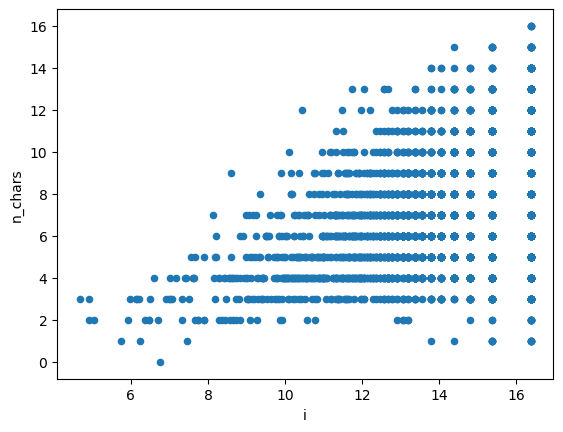

In [76]:
my_text.VOCAB.plot.scatter('i','n_chars');